# Astra Generator - particle generation

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from astra import AstraGenerator, template_dir
import os

In [3]:
# Point to executable, template input file
MY_GENERATOR_BIN = os.path.expandvars('$HOME/Code/astra/bin/generator')
GENERATOR_IN = os.path.join(template_dir, 'dcgun/generator.in')
list(map(os.path.exists, [MY_GENERATOR_BIN, GENERATOR_IN ]))

[True, True]

In [4]:
# Make generator object
G = AstraGenerator(input_file=GENERATOR_IN, generator_bin=MY_GENERATOR_BIN)

In [5]:
# Look at its input
G.input

{'fname': '/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp5iyazrdk/generator.part',
 'add': False,
 'n_add': 0,
 'ipart': 2000,
 'species': 'electrons',
 'probe': True,
 'noise_reduc': True,
 'cathode': True,
 'q_total': 0.1,
 'ref_zpos': 0,
 'ref_clock': 0,
 'ref_ekin': 1e-06,
 'high_res': True,
 'dist_x': 'r',
 'sig_x': 0.25,
 'c_sig_x': 5,
 'dist_px': 'g',
 'sig_px': 357.7,
 'c_sig_px': 5,
 'cor_px': 0,
 'dist_y': 'r',
 'sig_y': 0.25,
 'c_sig_y': 5,
 'dist_py': 'g',
 'sig_py': 357.7,
 'cor_py': 0,
 'dist_z': 'g',
 'sig_clock': 0.00849257,
 'c_sig_clock': 3,
 'dist_pz': 'g',
 'sig_ekin': 0.0005,
 'c_sig_ekin': 5}

In [6]:
# Change some input
G.input['ipart']= 999

In [7]:
# Run
G.verbose=True
G.run()

 --------------------------------------------------------------------------

                              generator              
                             Version 1.0             
                        DESY,  Hamburg 2002          
                        Wed Mar 11 20:59:33 

     Working File is:    /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/t
     Initializing        999      electrons
     including 6 probe particles at standard positions
     Particles start from a cathode
     Particles are quasi randomly distributed

          Energy spread too high.
                  23 times standard correction procedure



     Final check:
     Particles taken into account      N =        999
     total charge                      Q =    -0.1000     nC
     horizontal beam position          x =    -7.8510E-07 mm
     vertical beam position            y =     6.2144E-06 mm
     longitudinal beam position        z =      0.000     m
     horizontal beam size          sig x =     0

In [8]:
# Output is parsed as a ParticleGroup
P = G.output['particles']

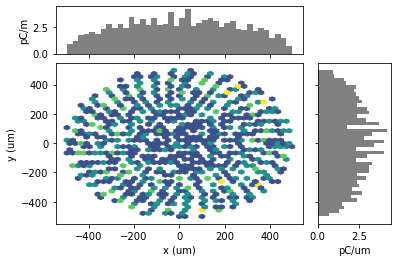

In [9]:
from pmd_beamphysics.plot import marginal_plot
marginal_plot(P, 'x', 'y', bins=40)

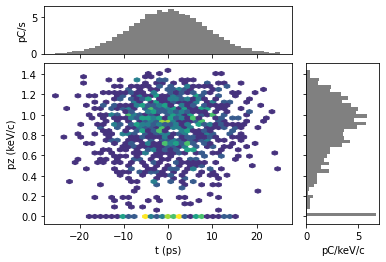

In [10]:
from pmd_beamphysics.plot import marginal_plot
marginal_plot(P, 't', 'pz', bins=40)

In [11]:
os.remove('NORRAN')